# 📊 Exploratory Data Analysis (EDA)

This notebook walks through the initial exploratory data analysis of the transaction dataset. The goal is to understand the data's structure, identify patterns, uncover anomalies, and form hypotheses that will guide our feature engineering and modeling process.

In [2]:
# 1. Import Libraries and Load Data

# Description:
# - Sets up environment
# - Imports pandas, numpy for data manipulation
# - Imports matplotlib, seaborn for data visualization
# - Loads dataset with graceful FileNotFoundError handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for all plots
sns.set_style('whitegrid')

# Load the dataset
try:
    df = pd.read_csv('../data/raw/data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: training.csv not found. Please ensure the file is in the 'data/raw/' directory.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent further errors

Dataset loaded successfully.


# 2. Initial Data Inspection

**Description**

Provides a high-level overview:

- `df.head()` shows the first 5 rows.
- `df.info()` shows technical summary: data types, counts, missing values.

In [3]:
if not df.empty:
    print("--- First 5 Rows ---")
    print(df.head())
    print("\n" + "="*50 + "\n")

    print("--- Data Info ---")
    df.info()

--- First 5 Rows ---
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Va

# 3. Descriptive Statistics

**Description**

`df.describe()` generates key descriptive statistics:

- Central Tendency: mean
- Dispersion: std
- Range & Quartiles: min, 25%, median, 75%, max

⚠️ A large difference between mean and median indicates skewed distribution.

In [4]:
if not df.empty:
    print("\n" + "="*50 + "\n")
    print("--- Descriptive Statistics for Numerical Features ---")
    print(df.describe())



--- Descriptive Statistics for Numerical Features ---
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


# 4. Distribution of Numerical Features

**Description**

Visualizes distribution of key numerical features like `Amount`:

- Histogram (linear scale) for overall distribution
- Histogram (log scale) to handle extreme outliers and visualize skewed data

/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_24378/3471380216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['ProductCategory'], ax=axes[0, 0], order=df['ProductCategory'].value_counts().index, palette='viridis')
/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_24378/3471380216.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['ChannelId'], ax=axes[0, 1], order=df['ChannelId'].value_counts().index, palette='plasma')
/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_24378/3471380216.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `le

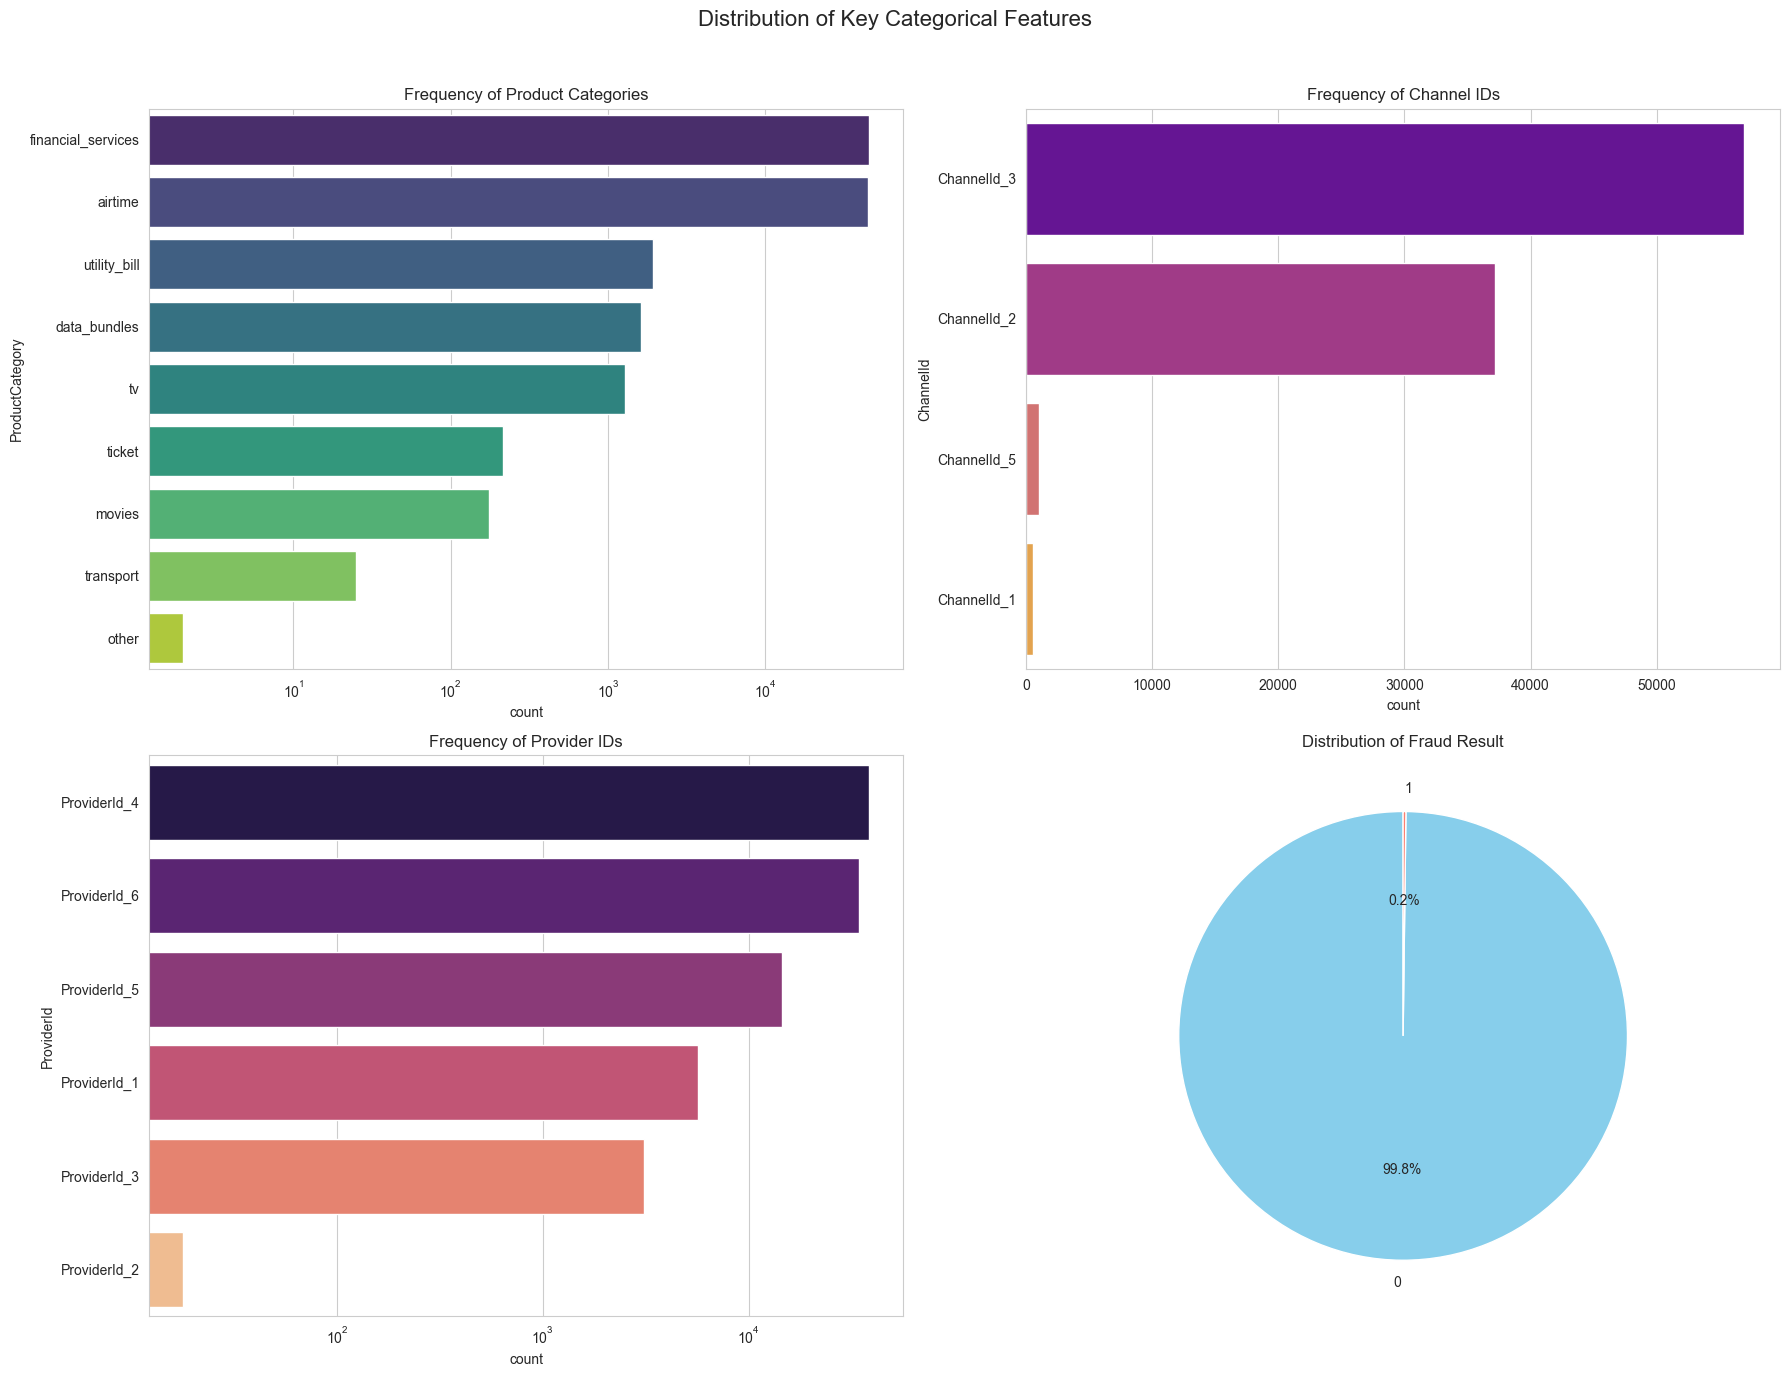

In [5]:
if not df.empty:
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('Distribution of Key Categorical Features', fontsize=16)

    # Plot Product Category
    sns.countplot(y=df['ProductCategory'], ax=axes[0, 0], order=df['ProductCategory'].value_counts().index, palette='viridis')
    axes[0, 0].set_title('Frequency of Product Categories')
    axes[0, 0].set_xscale('log')

    # Plot Channel ID
    sns.countplot(y=df['ChannelId'], ax=axes[0, 1], order=df['ChannelId'].value_counts().index, palette='plasma')
    axes[0, 1].set_title('Frequency of Channel IDs')

    # Plot Provider ID
    sns.countplot(y=df['ProviderId'], ax=axes[1, 0], order=df['ProviderId'].value_counts().index, palette='magma')
    axes[1, 0].set_title('Frequency of Provider IDs')
    axes[1, 0].set_xscale('log')

    # Plot Fraud Result
    df['FraudResult'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1], colors=['skyblue', 'salmon'], startangle=90)
    axes[1, 1].set_title('Distribution of Fraud Result')
    axes[1, 1].set_ylabel('')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# 6. Correlation Analysis

**Description**

Visualizes strength and direction of linear relationships:

- +1: Strong positive correlation
- -1: Strong negative correlation
- 0: No linear correlation

Useful for identifying redundant features.

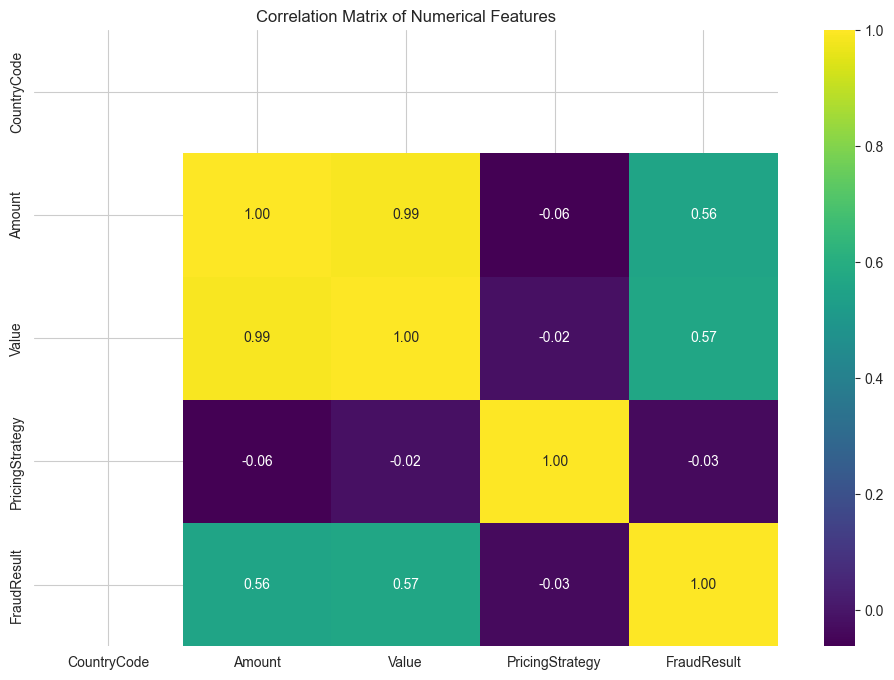

In [6]:
if not df.empty:
    plt.figure(figsize=(12, 8))
    numeric_df = df.select_dtypes(include=np.number)
    sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# 7. Outlier Detection

**Description**

Box plot identifies outliers (points outside whiskers) for features like `Amount`. These require special handling during preprocessing.

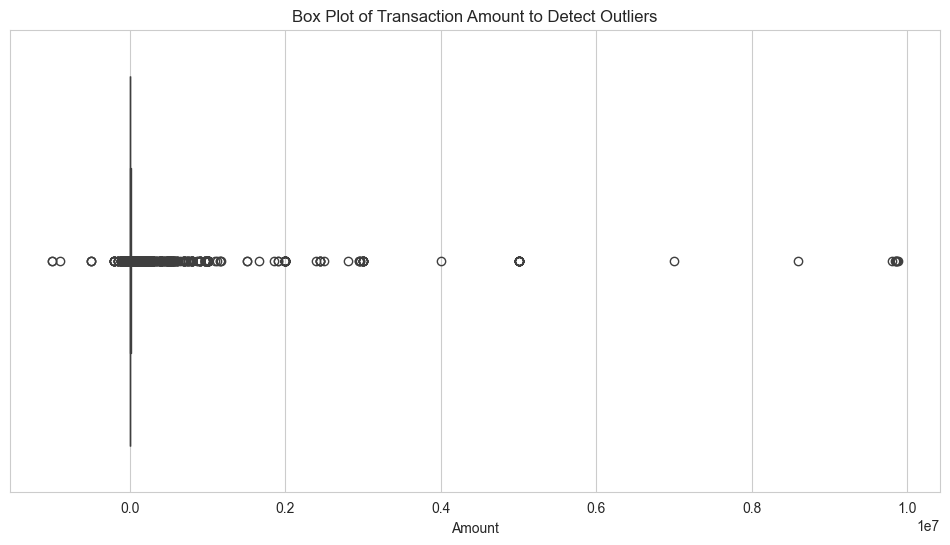

In [7]:
if not df.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Amount'])
    plt.title('Box Plot of Transaction Amount to Detect Outliers')
    plt.show()

# 8. Summary of EDA Findings

✅ **Data Integrity**: No missing values, simplifying processing.

✅ **Highly Skewed Financial Data**: Amount features are heavily right-skewed → consider log transform.

✅ **Feature Redundancy**: Amount and Value are perfectly correlated (corr = 1.00) → drop one.

✅ **Imbalanced Categories**: ProductCategory, ProviderId, ChannelId have few dominant classes → group rare categories during encoding.

✅ **Low Fraud Incidence**: FraudResult is rare (0.2%) – critical for later modeling strategies even if not used as primary proxy.



